In [24]:
import os
import pandas as pd

In [25]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/'

#### Extracting Visualization Plots - Action Count and Time Spent by Completed Step

Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C001A_ActionSteps.ipynb


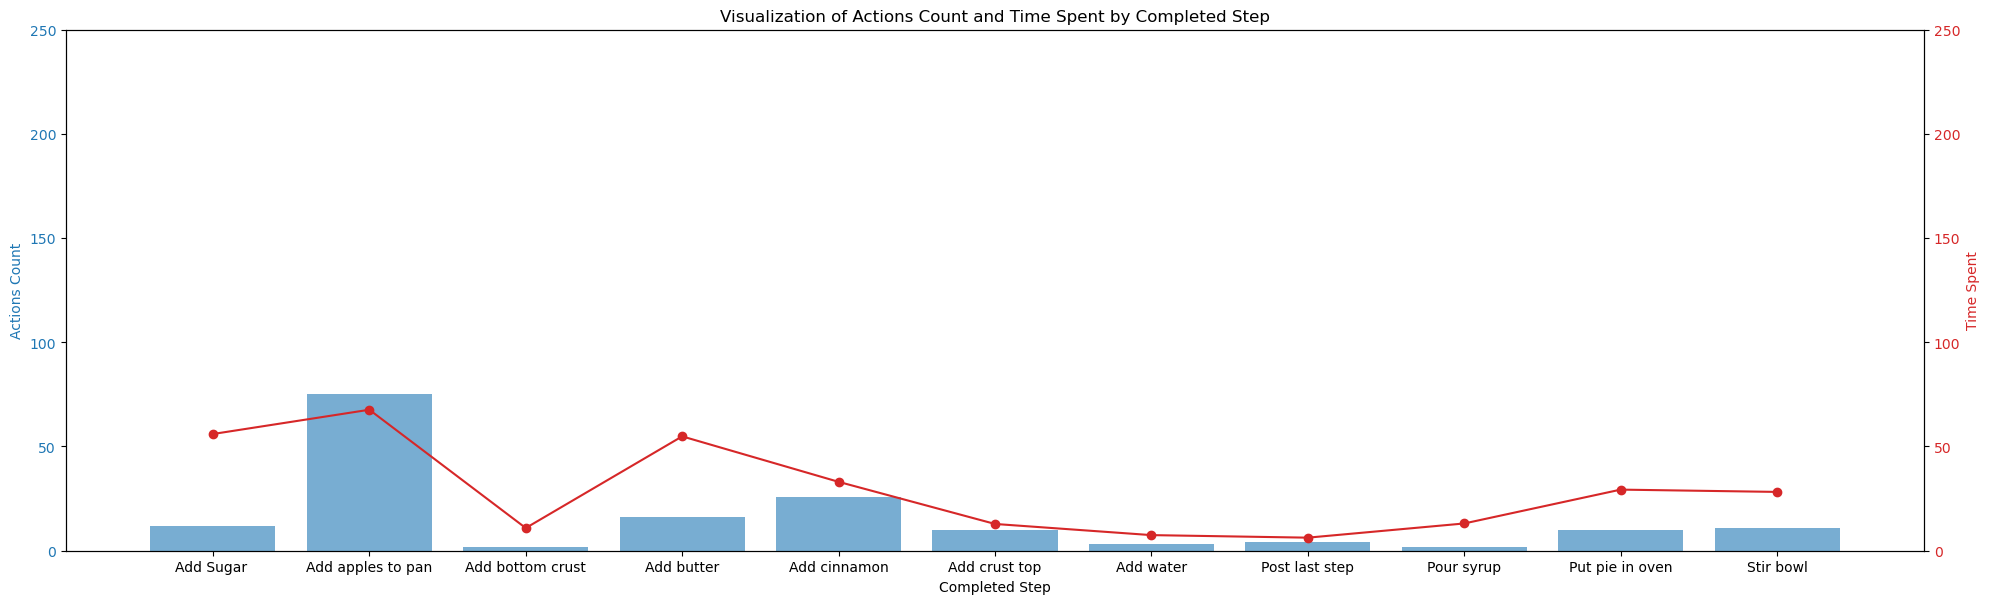

Extracted df_grouped from C001A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C003A_ActionSteps.ipynb


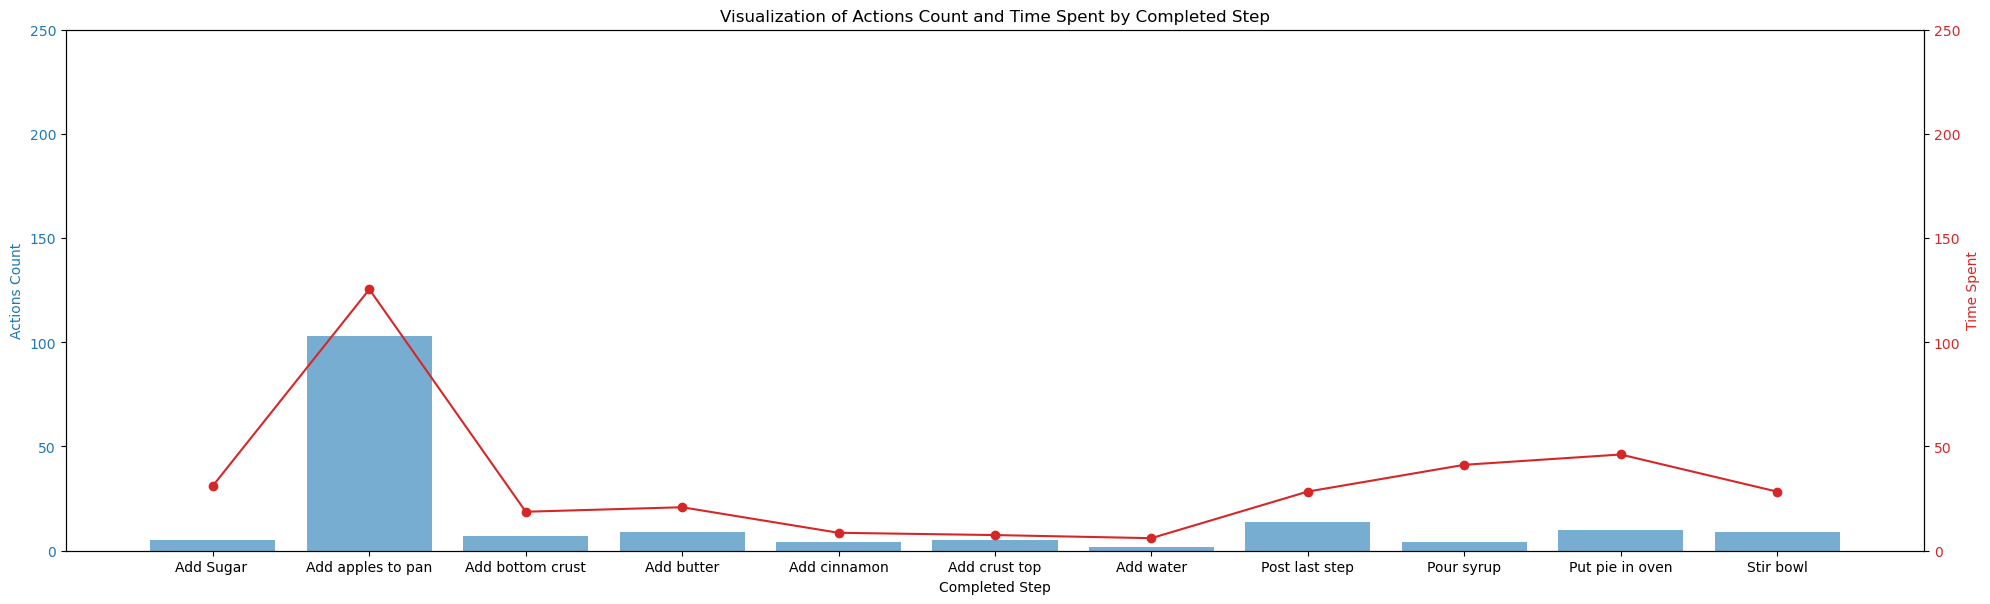

Extracted df_grouped from C003A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C006D_ActionSteps.ipynb


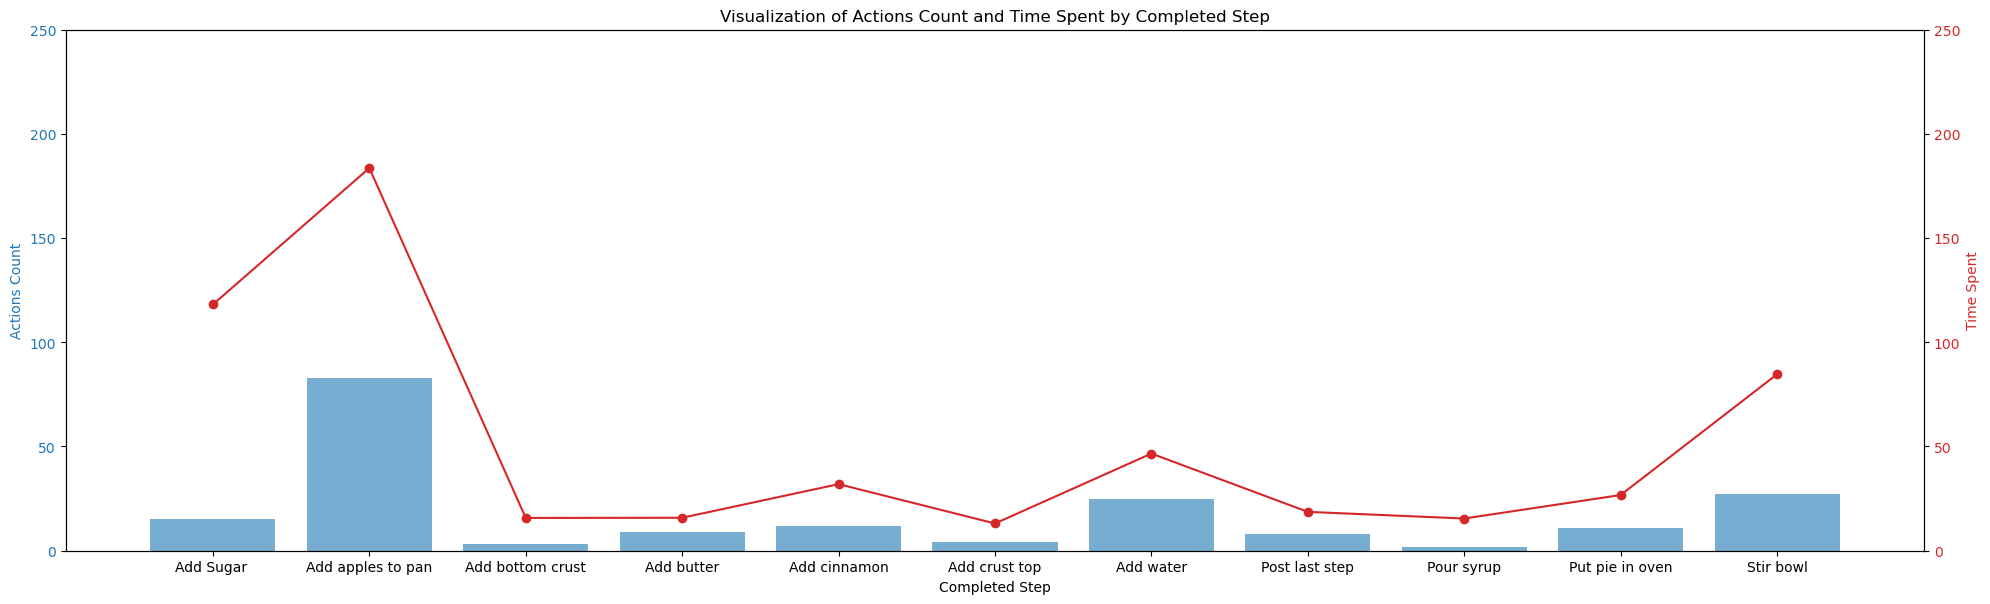

Extracted df_grouped from C006D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C008D_ActionSteps.ipynb


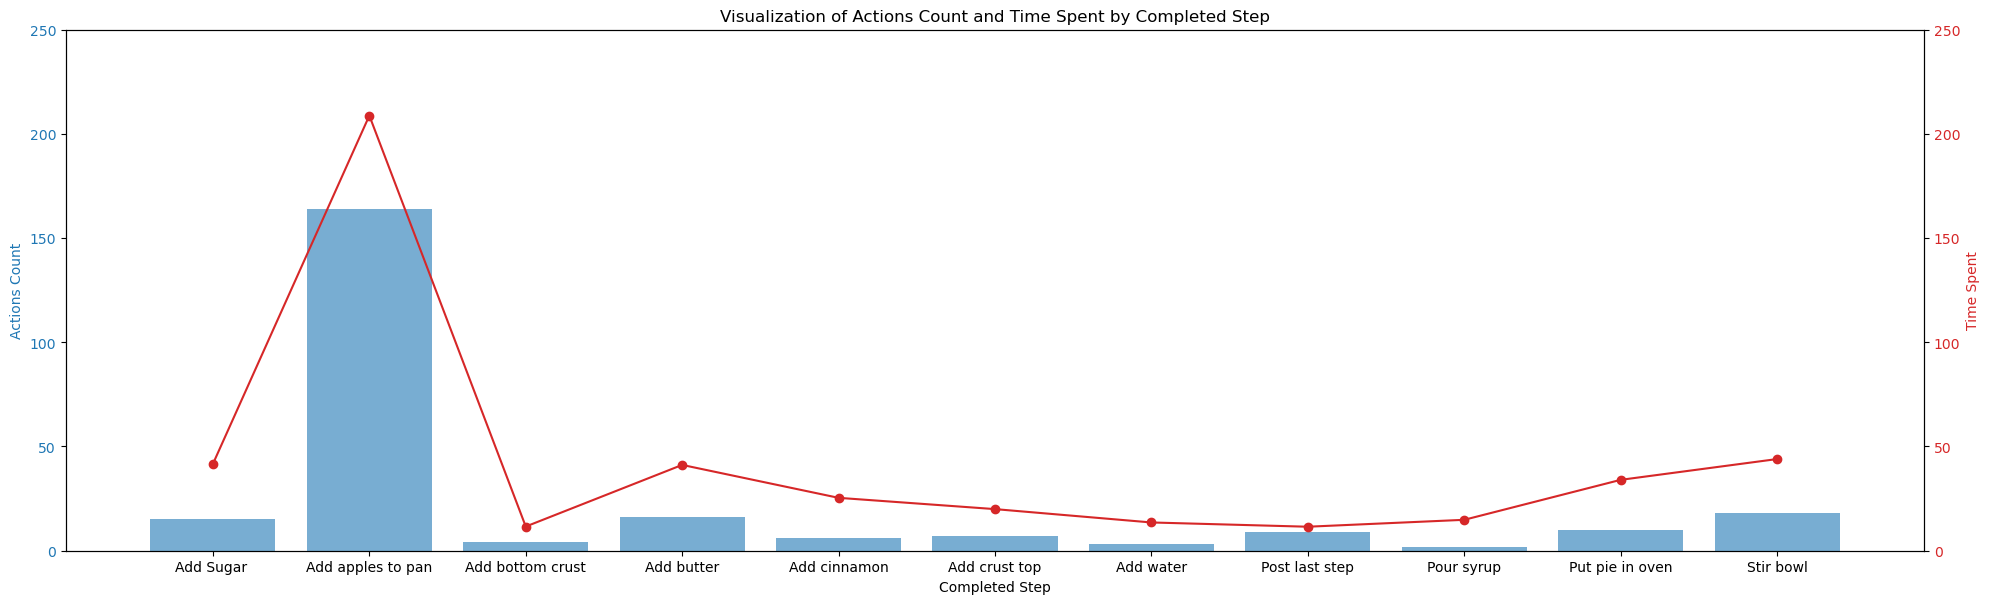

Extracted df_grouped from C008D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C009A_ActionSteps.ipynb


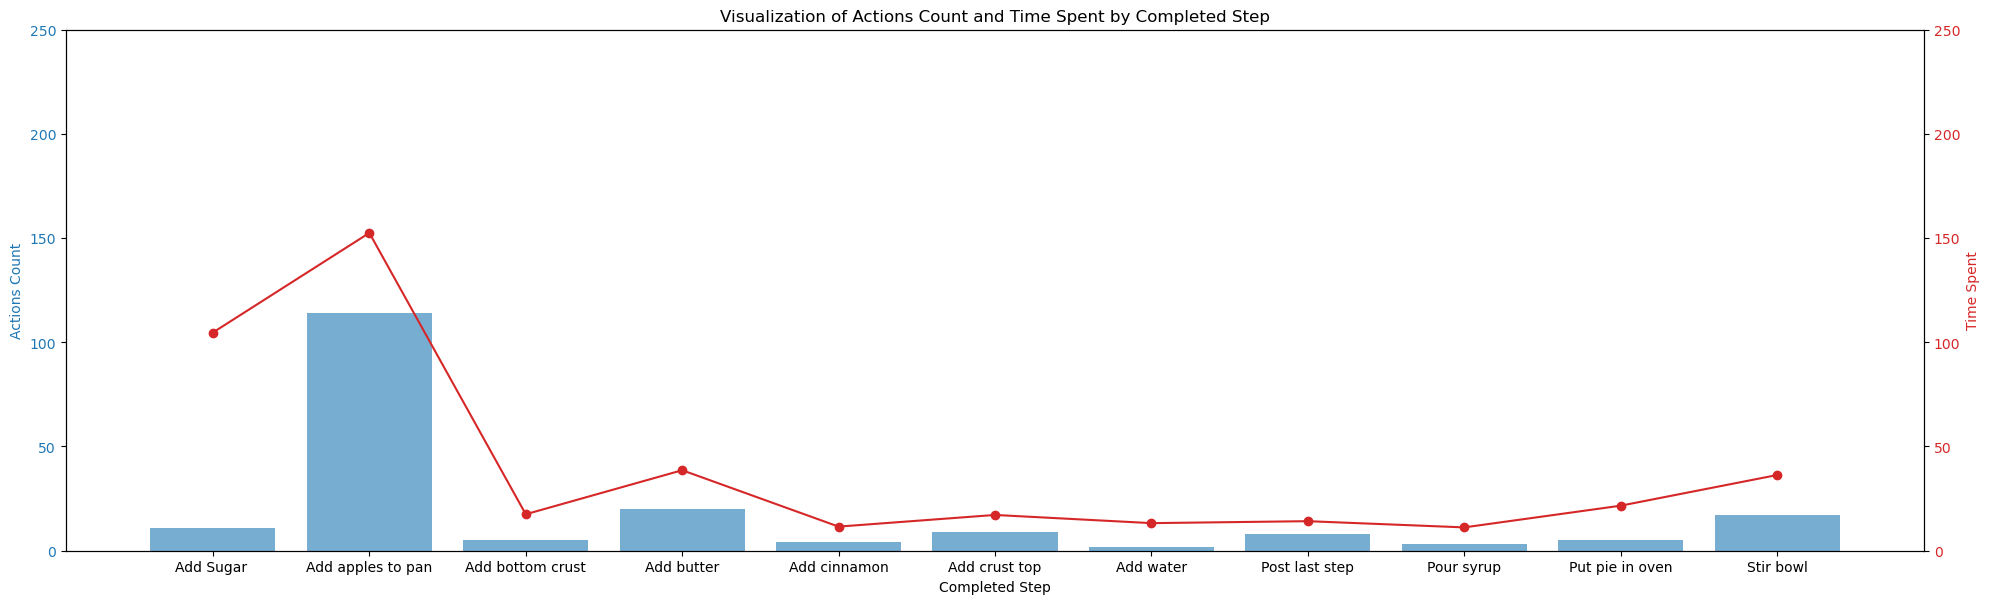

Extracted df_grouped from C009A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C012D_ActionSteps.ipynb


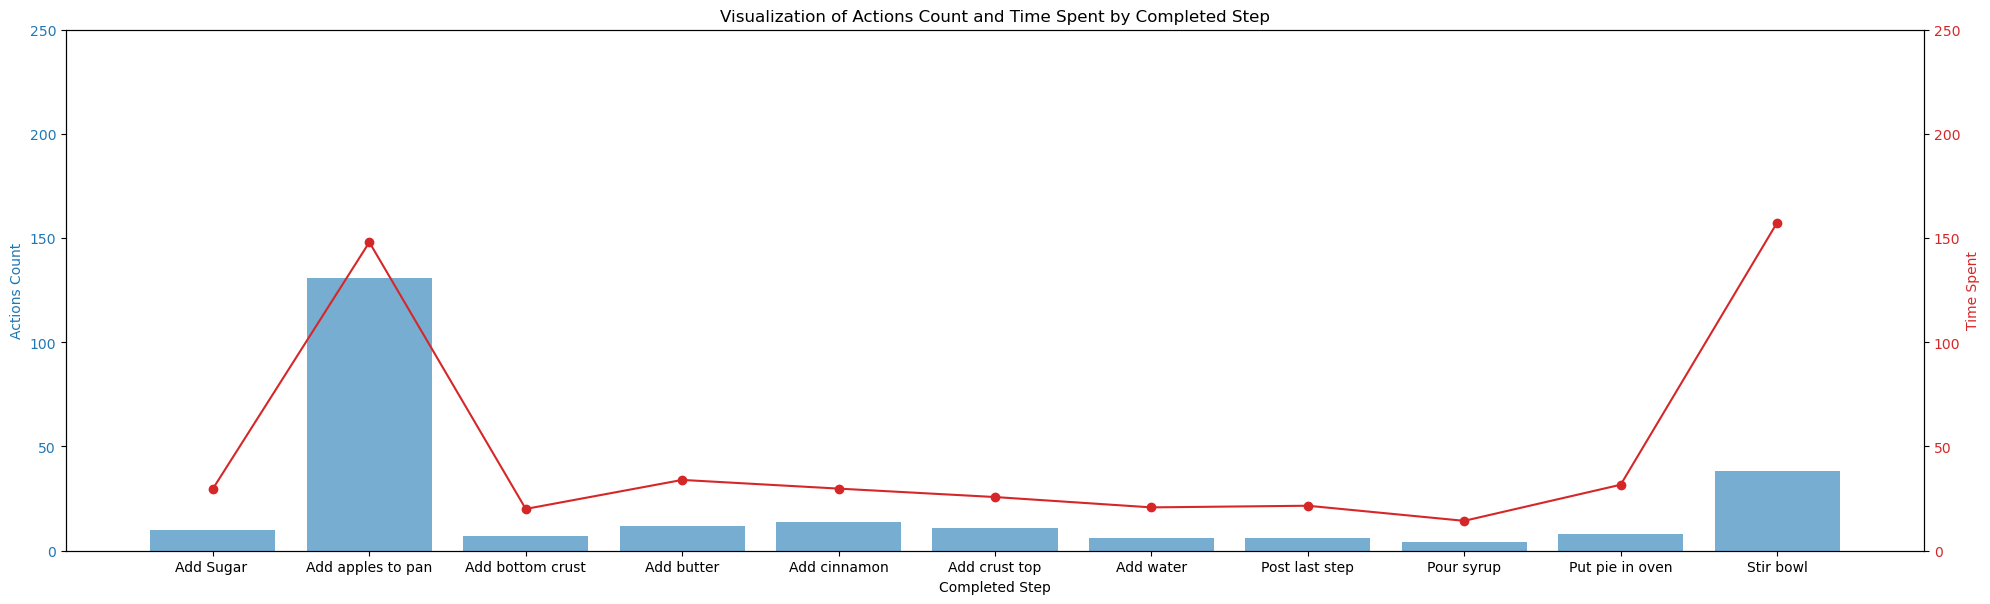

Extracted df_grouped from C012D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C013A_ActionSteps.ipynb


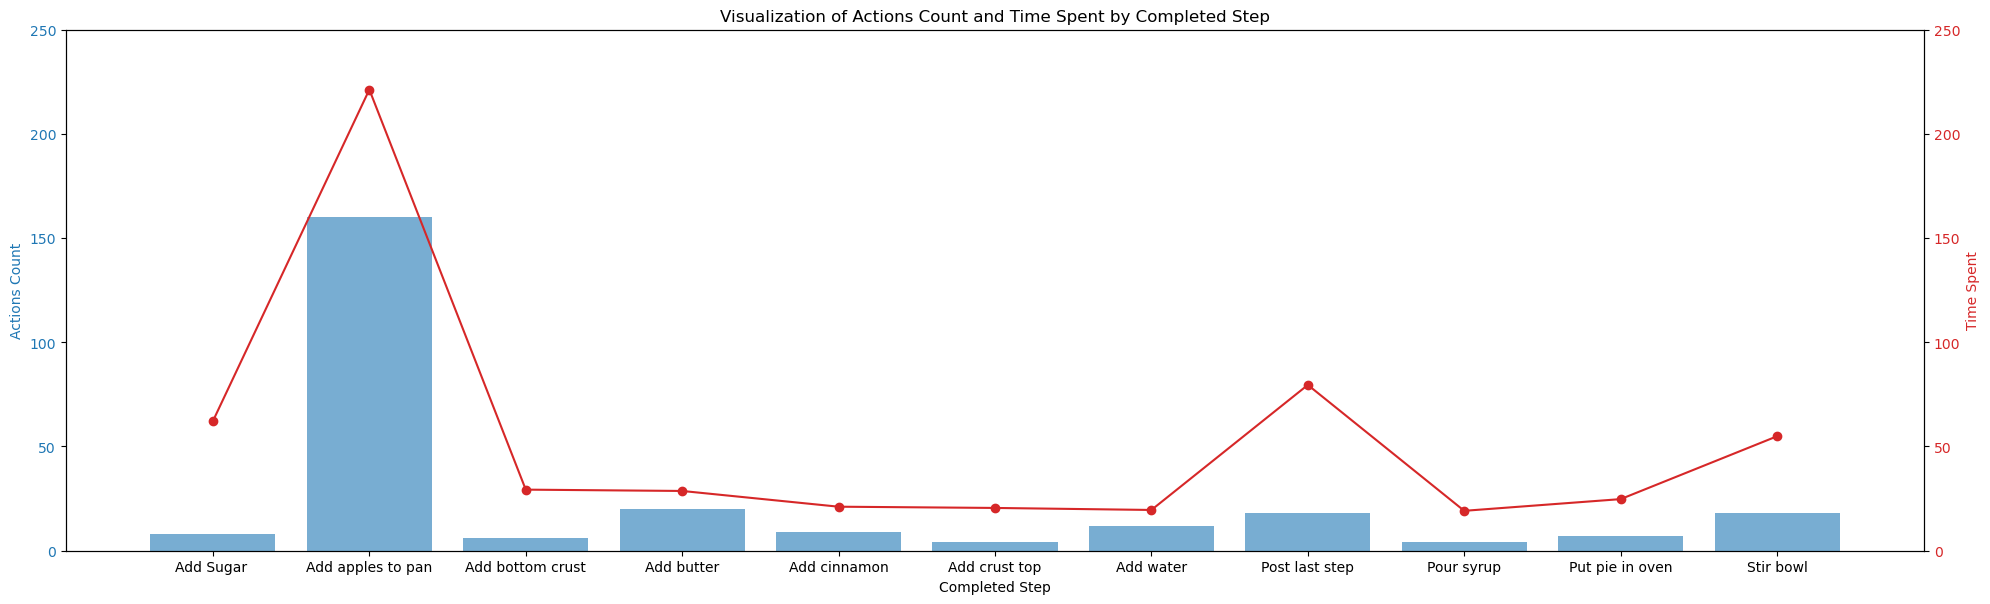

Extracted df_grouped from C013A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C016D_ActionSteps.ipynb


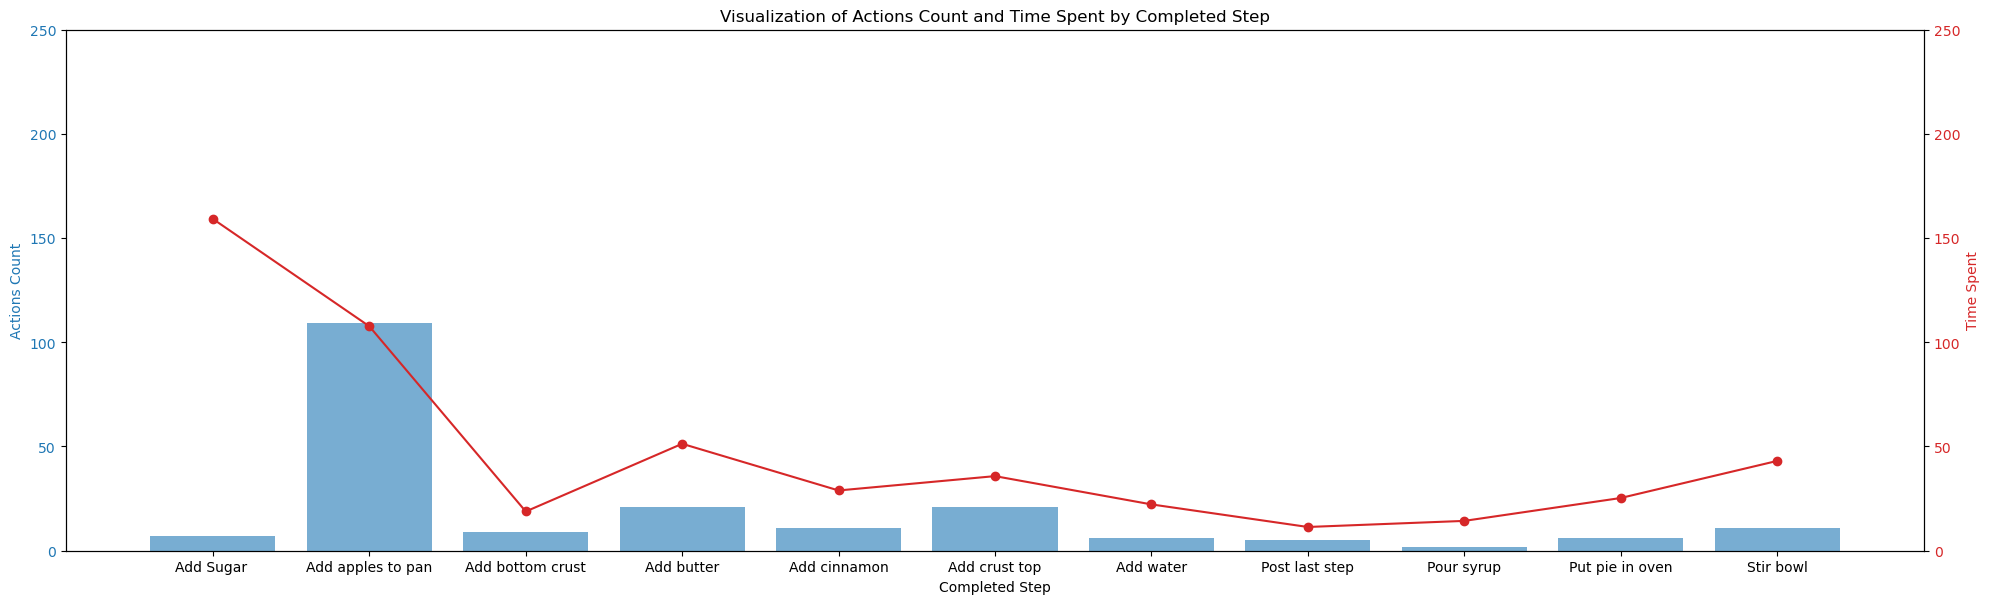

Extracted df_grouped from C016D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C017A_ActionSteps.ipynb


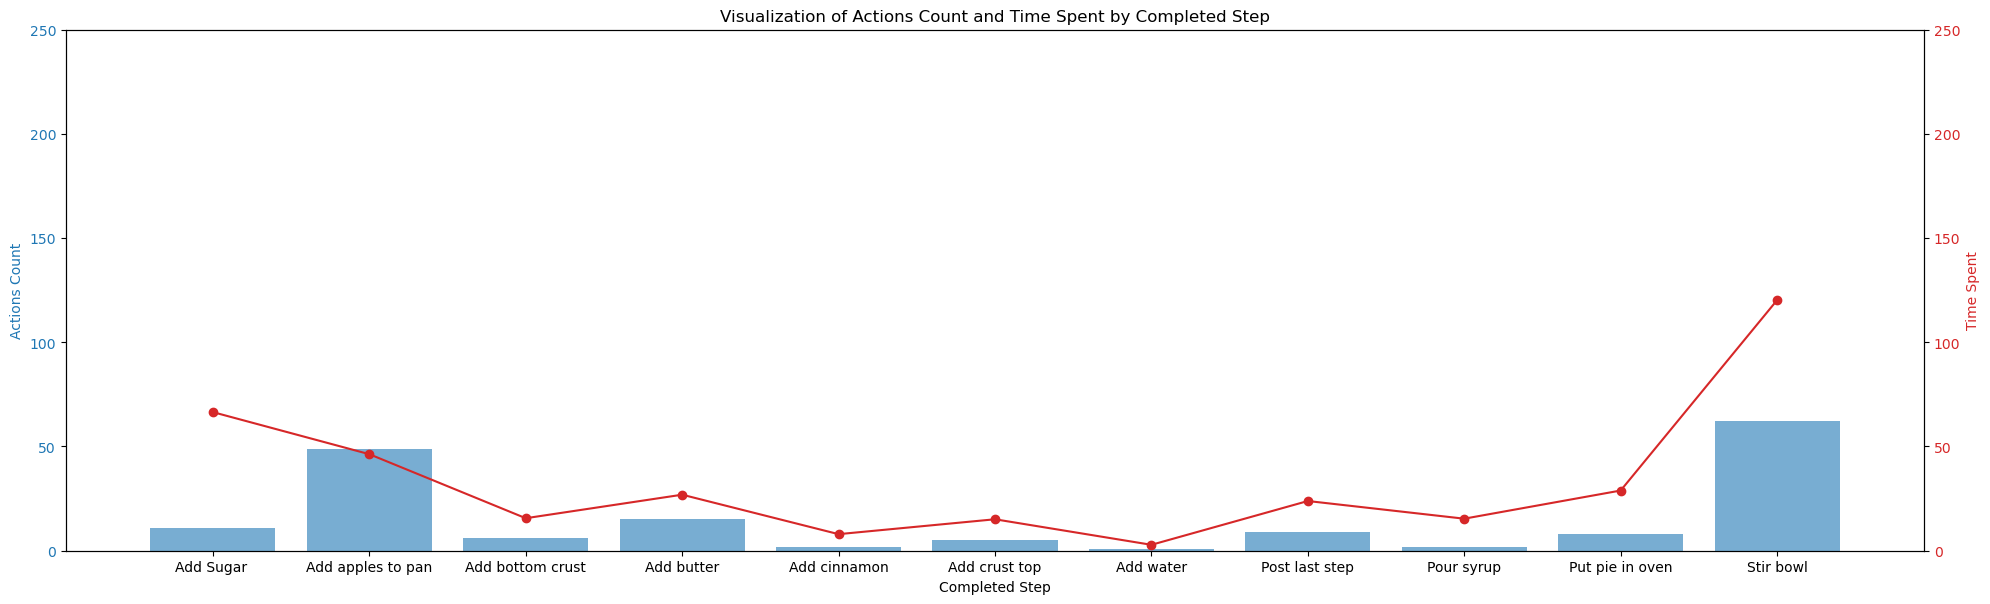

Extracted df_grouped from C017A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C020D_ActionSteps.ipynb


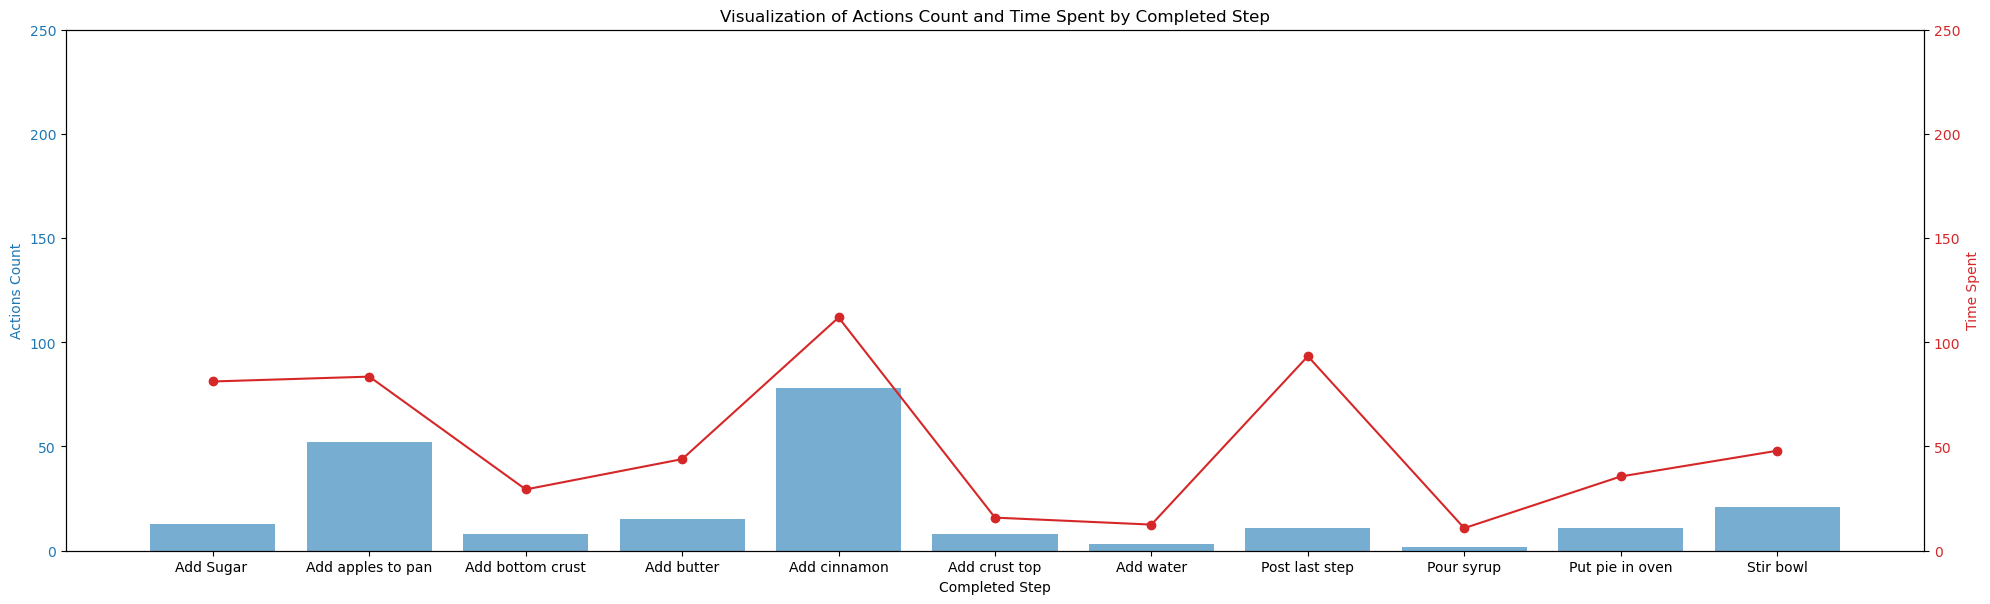

Extracted df_grouped from C020D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C021A_ActionSteps.ipynb


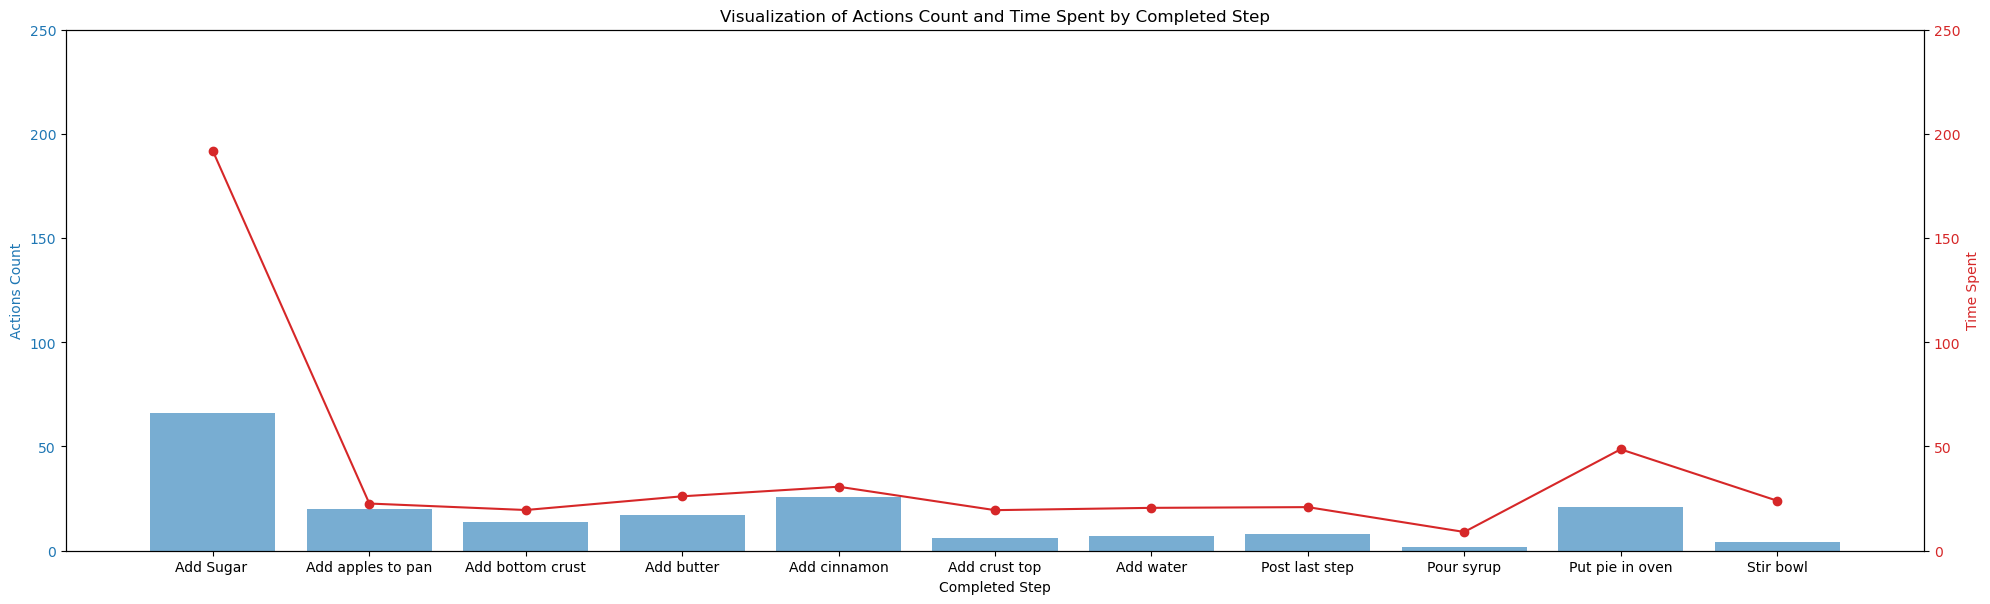

Extracted df_grouped from C021A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C024D_ActionSteps.ipynb


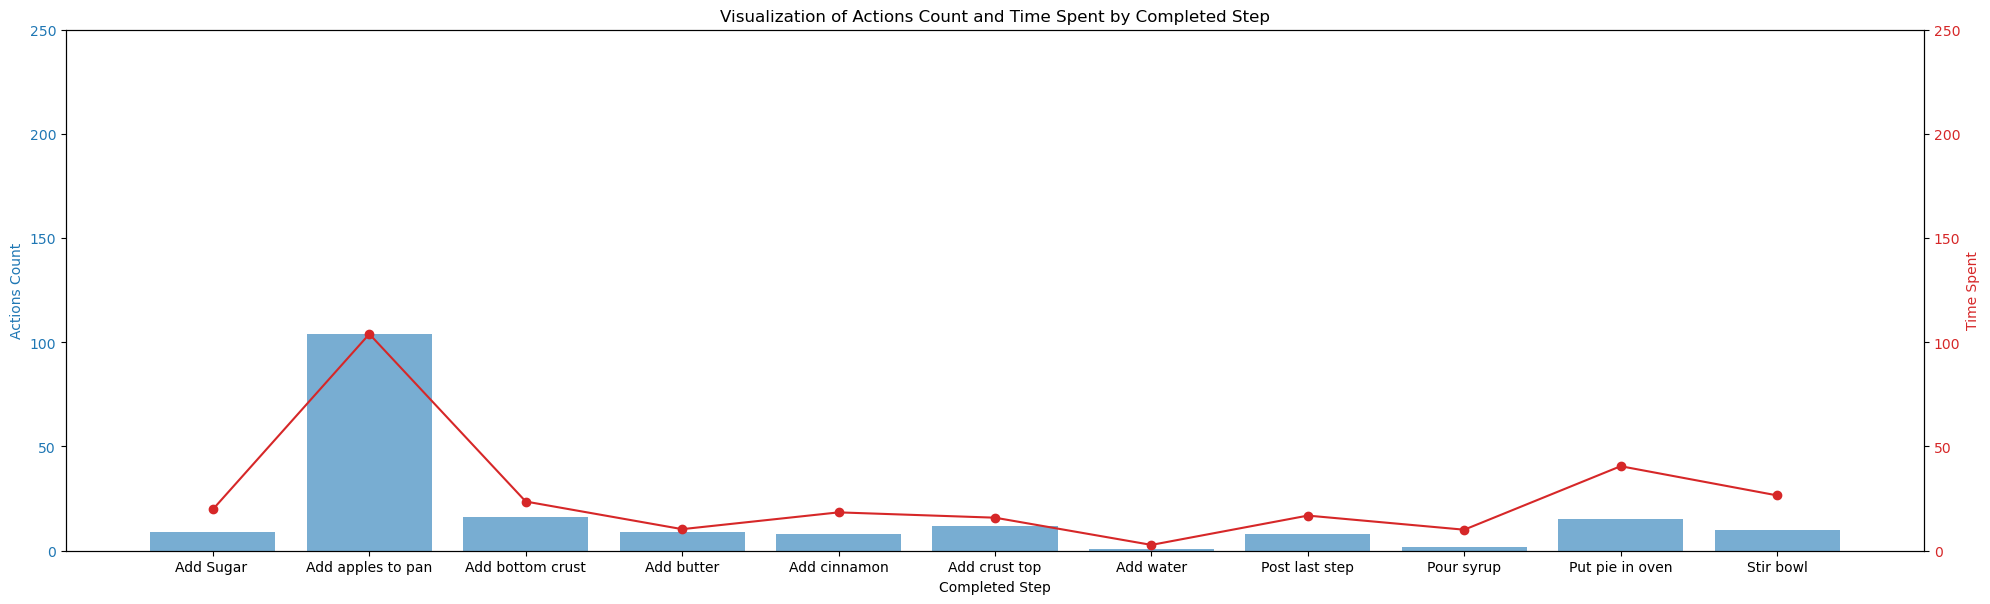

Extracted df_grouped from C024D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C025A_ActionSteps.ipynb


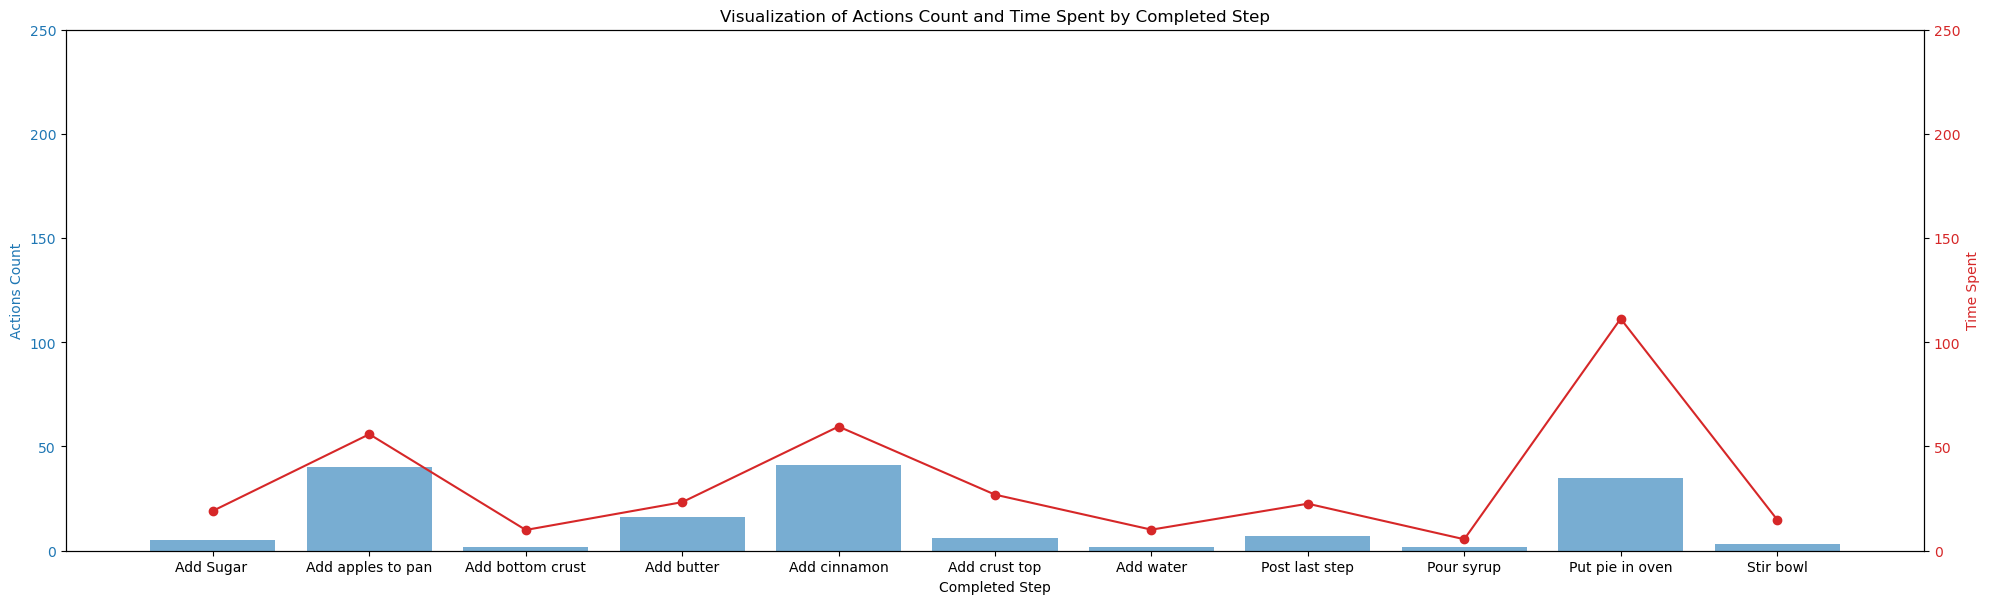

Extracted df_grouped from C025A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C028D_ActionSteps.ipynb


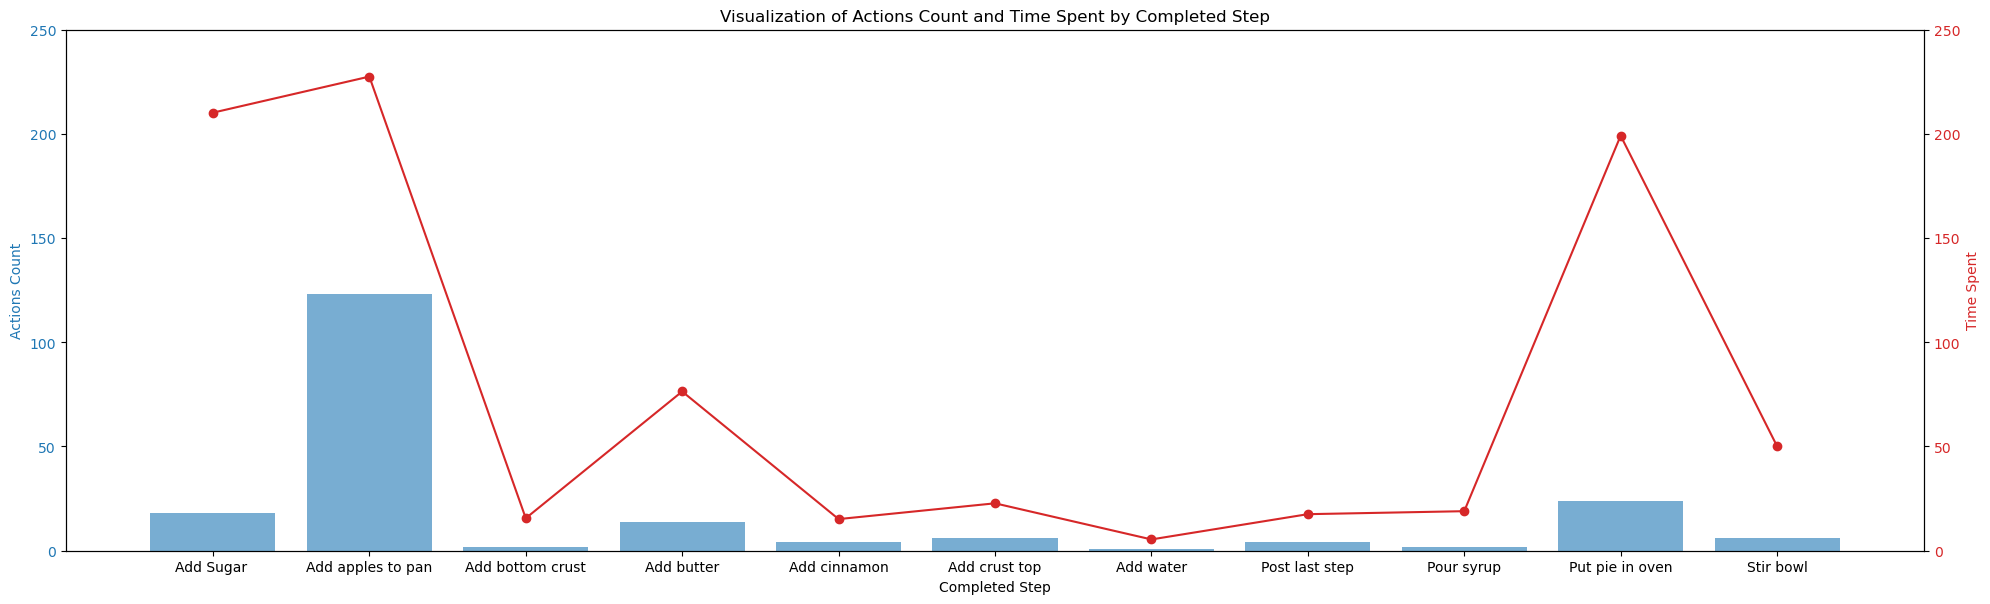

Extracted df_grouped from C028D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C029A_ActionSteps.ipynb


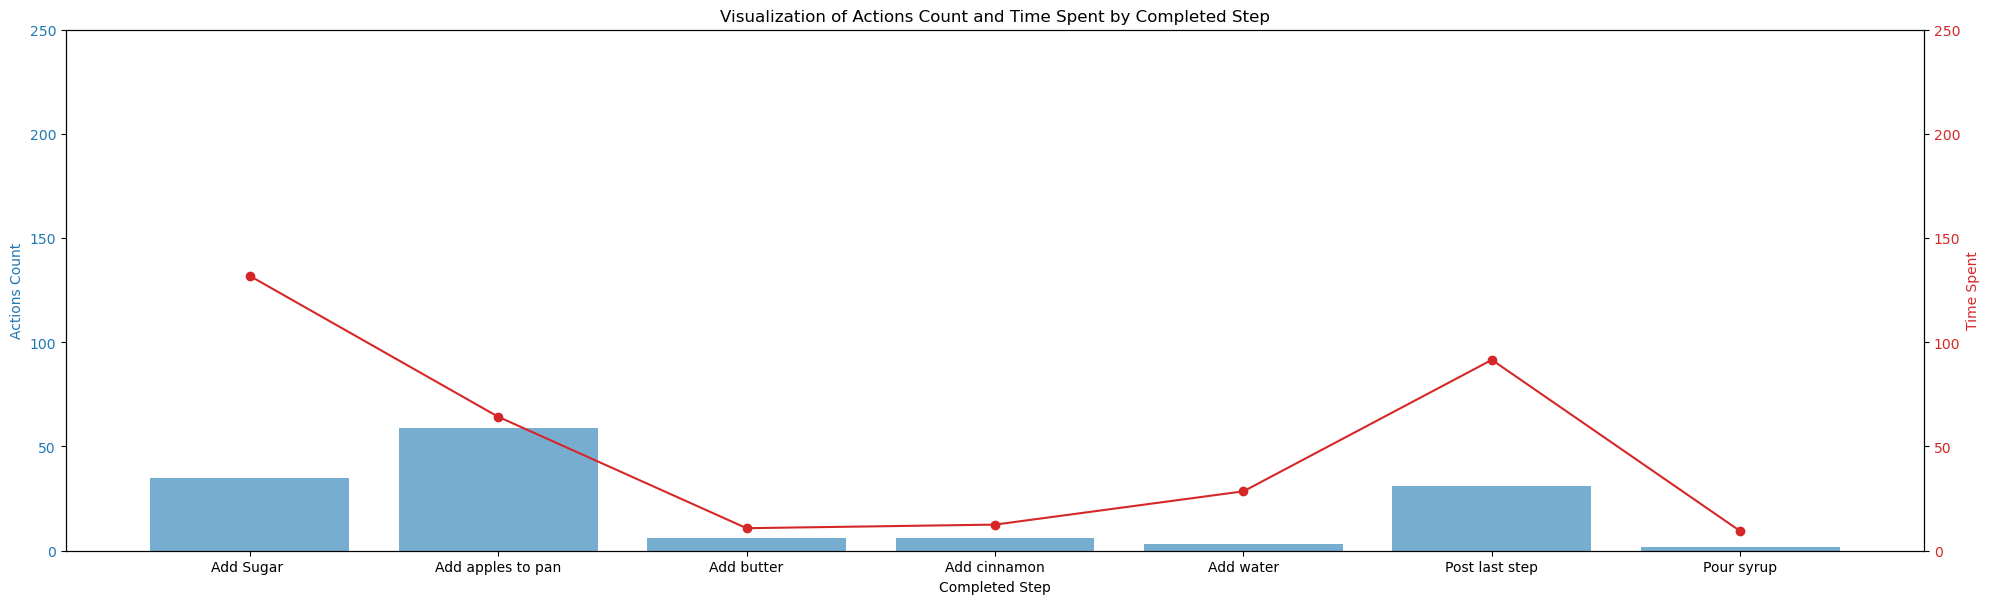

Extracted df_grouped from C029A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C032D_ActionSteps.ipynb


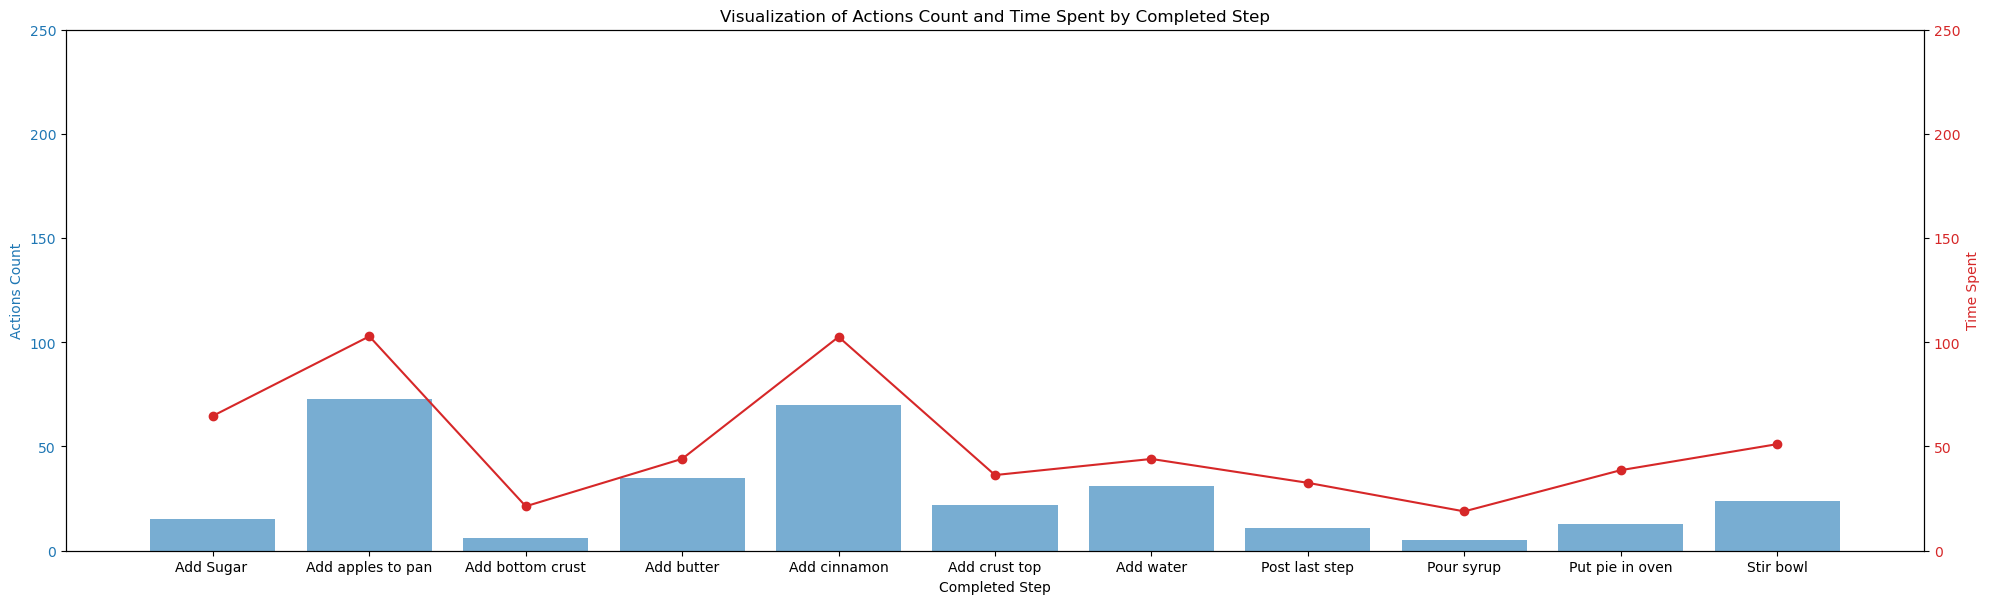

Extracted df_grouped from C032D_ActionSteps.ipynb


In [26]:
import nbformat

# List to store the dataframes
dfs = []

# Function to execute cells and extract totals_df
def extract_totals_df(nb):
    exec_env = {}
    df = None
    # Execute all cells to set up the environment
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, exec_env)
            except Exception as e:
                print(f"Error executing cell: {cell.source}\n{e}")

    # Extract totals_df
    df = exec_env.get('df_grouped')
    return df

# Process each notebook file
for filename in os.listdir(directory):
    if filename.endswith("_ActionSteps.ipynb"):
        filepath = os.path.join(directory, filename)
        print(f"Processing file: {filepath}")
        
        with open(filepath) as f:
            nb = nbformat.read(f, as_version=4)
        
        df = extract_totals_df(nb)
        
        if df is not None:
            print(f"Extracted df_grouped from {filename}")
            dfs.append(df)
        else:
            print(f"No df_grouped found in {filename}")

combined_df = pd.concat(dfs)


#### Extracting Action Counts for Participants according to every completed step

In [27]:
import nbformat
import glob
import matplotlib.pyplot as plt

In [28]:
def extract_dataframe(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'result_df' in local_context:
                    return local_context['result_df']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# List to store dataframes from each notebook
dataframes = []

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/'
file_pattern = directory + '*_ActionSteps.ipynb'

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]  # Extract the first 4 characters of the filename
    df = extract_dataframe(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add a new column for Participant ID
        dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Aggregate the data
aggregated_data = combined_df.groupby(['Participant', 'Completed Step']).agg({'Actions Count': 'sum'}).reset_index()

aggregated_data



,Participant,Completed Step,Actions Count
0,C001,Add Sugar,12
1,C001,Add apples to pan,75
2,C001,Add bottom crust,2
3,C001,Add butter,16
4,C001,Add cinnamon,26
...,...,...,...
167,C032,Add water,31
168,C032,Post last step,11
169,C032,Pour syrup,5
170,C032,Put pie in oven,13


In [29]:
pivot_table = aggregated_data.pivot_table(index='Completed Step', columns='Participant', values='Actions Count', fill_value=0)
pivot_table = pivot_table.astype(int)
statistics = pd.DataFrame()
statistics['Mean'] = pivot_table.mean(axis=1)
statistics['Median'] = pivot_table.median(axis=1)
statistics['Standard Deviation'] = pivot_table.std(axis=1)
final_table = pd.concat([pivot_table, statistics], axis=1)
final_table

,C001,C003,C006,C008,C009,C012,C013,C016,C017,C020,C021,C024,C025,C028,C029,C032,Mean,Median,Standard Deviation
Completed Step,,,,,,,,,,,,,,,,,,,
Add Sugar,12,5,15,15,11,10,8,7,11,13,66,9,5,18,35,15,15.9375,11.5,15.088489
Add apples to pan,75,103,83,164,114,131,160,109,49,52,20,104,40,123,59,73,91.1875,93.0,42.011457
Add bottom crust,2,7,3,4,5,7,6,9,6,8,14,16,2,2,0,6,6.0625,6.0,4.296801
Add butter,16,9,9,16,20,12,20,21,15,15,17,9,16,14,6,35,15.6250,15.5,6.761410
Add cinnamon,26,4,12,6,4,14,9,11,2,78,26,8,41,4,6,70,20.0625,10.0,23.532867
Add crust top,10,5,4,7,9,11,4,21,5,8,6,12,6,6,0,22,8.5000,6.5,5.876507
Add water,3,2,25,3,2,6,12,6,1,3,7,1,2,1,3,31,6.7500,3.0,8.843076
Post last step,4,14,8,9,8,6,18,5,9,11,8,8,7,4,31,11,10.0625,8.0,6.647995
Pour syrup,2,4,2,2,3,4,4,2,2,2,2,2,2,2,2,5,2.6250,2.0,1.024695


In [30]:
pivot_table = aggregated_data.pivot_table(index='Completed Step', columns='Participant', values='Actions Count', fill_value=0)
pivot_table = pivot_table.astype(int)
pivot_table = pivot_table.transpose()
pivot_table['Action Count S.D'] = pivot_table.std(axis=1)
pivot_table

Completed Step,Add Sugar,Add apples to pan,Add bottom crust,Add butter,Add cinnamon,Add crust top,Add water,Post last step,Pour syrup,Put pie in oven,Stir bowl,Action Count S.D
Participant,,,,,,,,,,,,
C001,12,75,2,16,26,10,3,4,2,10,11,20.968374
C003,5,103,7,9,4,5,2,14,4,10,9,29.176267
C006,15,83,3,9,12,4,25,8,2,11,27,23.036730
C008,15,164,4,16,6,7,3,9,2,10,18,47.043500
C009,11,114,5,20,4,9,2,8,3,5,17,32.351198
C012,10,131,7,12,14,11,6,6,4,8,38,37.176239
C013,8,160,6,20,9,4,12,18,4,7,18,45.411052
C016,7,109,9,21,11,21,6,5,2,6,11,30.500671
C017,11,49,6,15,2,5,1,9,2,8,62,20.441936


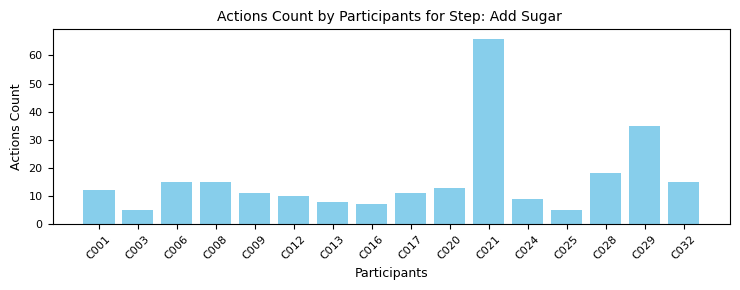

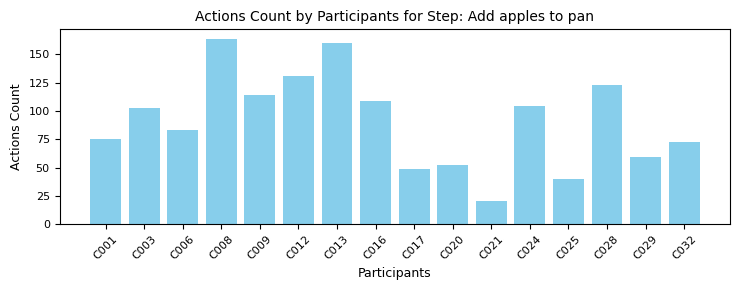

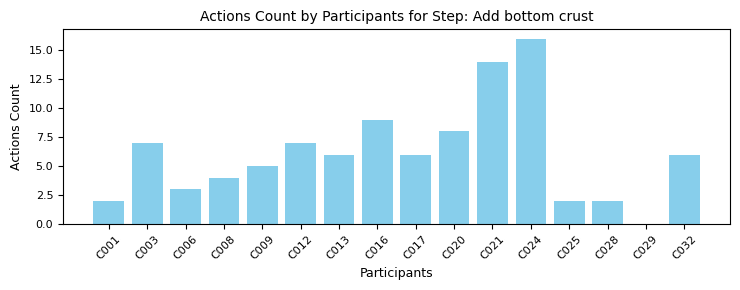

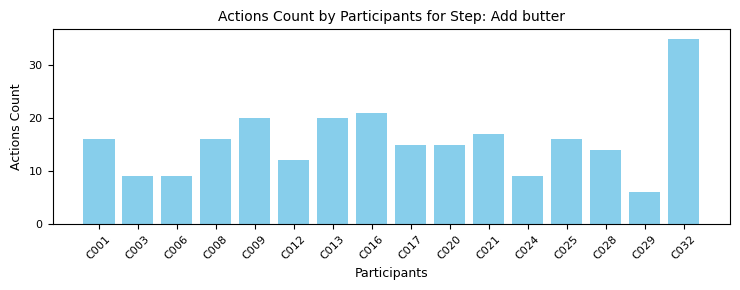

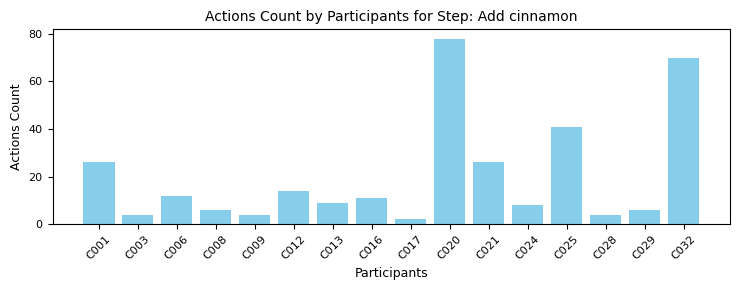

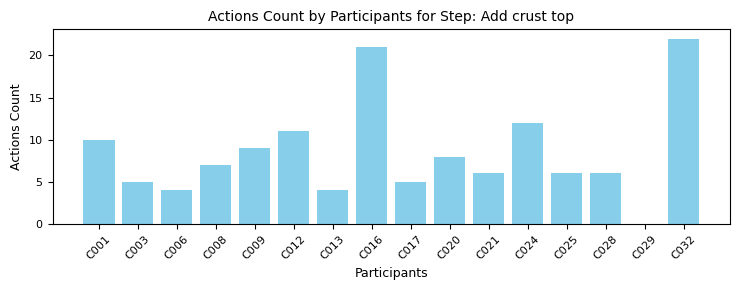

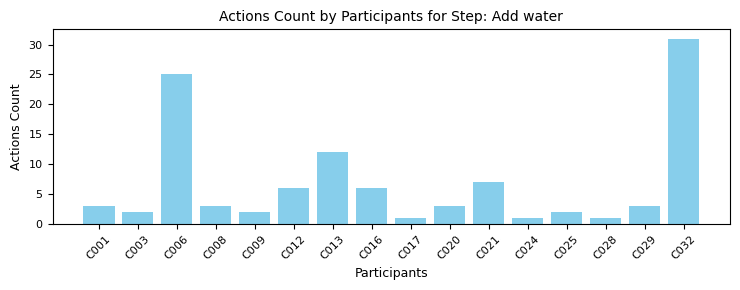

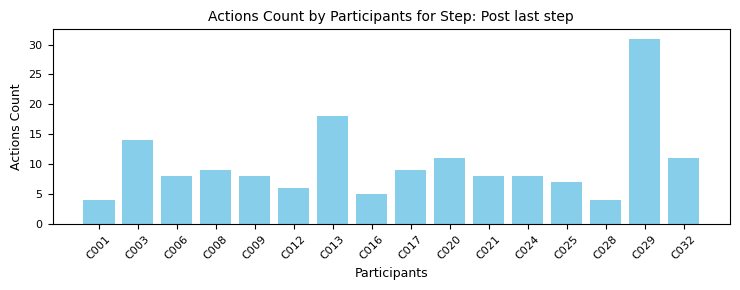

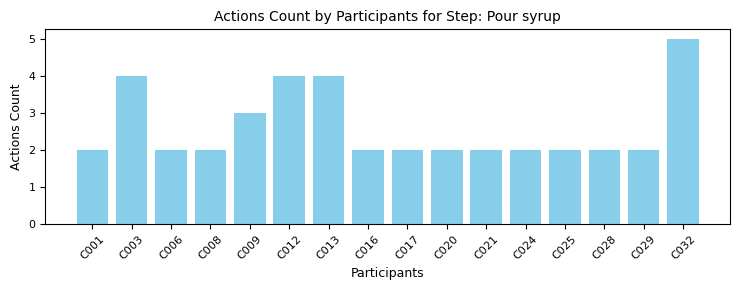

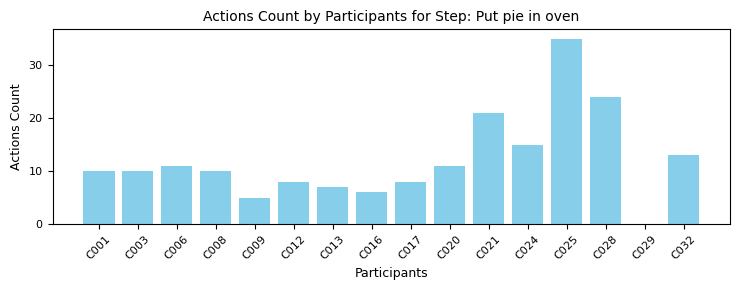

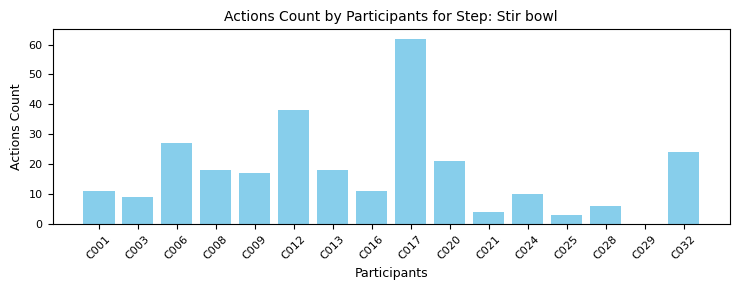

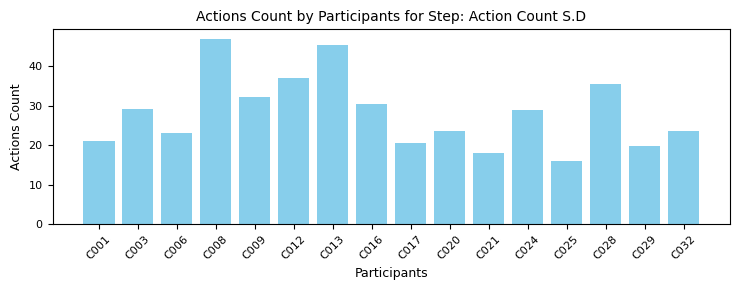

In [31]:
# Define the number of steps
steps = pivot_table.columns

for step in steps:
    plt.figure(figsize=(7.5,3))
    plt.bar(pivot_table.index, pivot_table[step], color='skyblue')
    plt.xlabel('Participants',fontsize=9)
    plt.ylabel('Actions Count',fontsize=9)
    plt.title(f'Actions Count by Participants for Step: {step}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

#### Extracting Action Counts for every participant according to "Action Type"

In [32]:
def extract_features_summary(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                # Check if the cell contains plotting code and skip it
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'features_summary' in local_context:
                    return local_context['features_summary']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

features_summaries = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_features_summary(file_path)
    if df is not None:
        df['Participant'] = participant_id 
        features_summaries.append(df)
    else:
        print(f"No features_summary found in {file_path}")

combined_features_summary = pd.concat(features_summaries, ignore_index=True)
combined_features_summary

,Action Type,Action Count,Total Missed Interactions,Participant
0,Right Hand Grab,72,9.0,C001
1,Right Hand Released,51,0.0,C001
2,Chopped,21,0.0,C001
3,Left Hand Grab,14,1.0,C001
4,Left Hand Released,13,0.0,C001
...,...,...,...,...
73,Left Hand Released,20,0.0,C029
74,Chopped,11,0.0,C029
75,Right Hand Grab,160,20.0,C032
76,Right Hand Released,124,0.0,C032


In [50]:
pivot_table_sum = combined_features_summary.pivot_table(
    index='Action Type',
    columns='Participant',
    values='Action Count',
    aggfunc='sum',
    fill_value=0
)
pivot_table_sum=pivot_table_sum.transpose()
pivot_table_sum

Action Type,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
Participant,,,,,
C001,21,14,13,72,51
C003,24,15,15,70,48
C006,13,54,27,69,36
C008,25,22,16,114,77
C009,21,7,7,89,74
C012,17,31,21,97,81
C013,22,66,51,76,51
C016,21,53,38,55,41
C017,17,24,18,67,44


In [51]:
#pivot_table_sum.to_csv('ActionType_ComplexPie.csv')

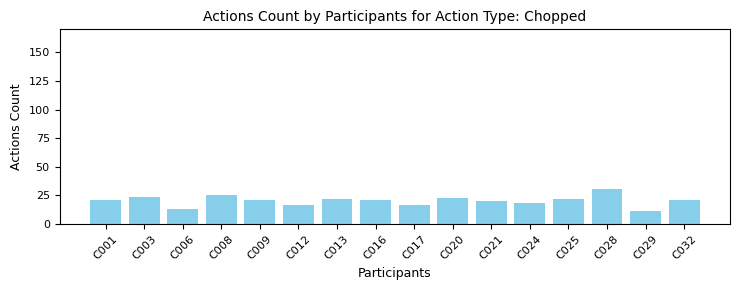

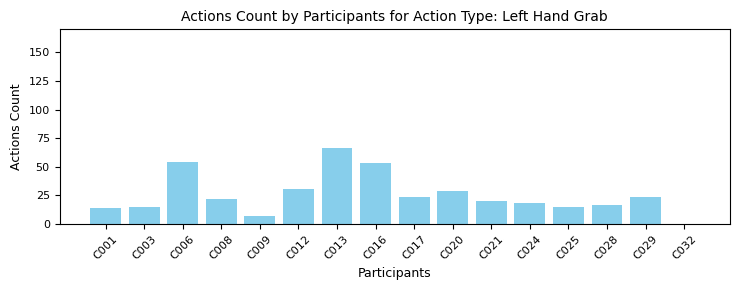

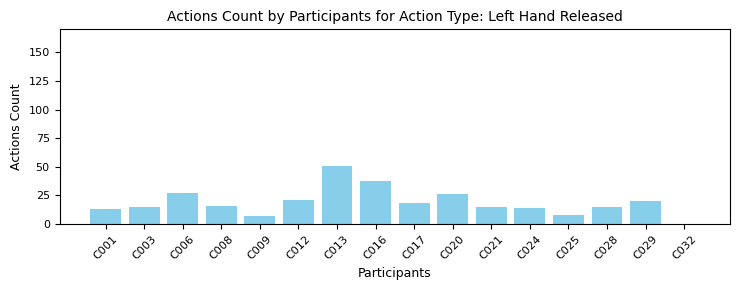

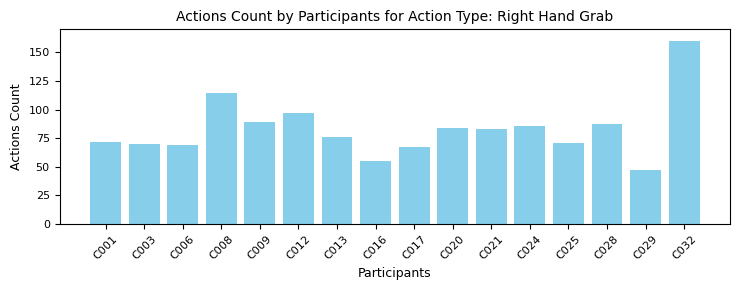

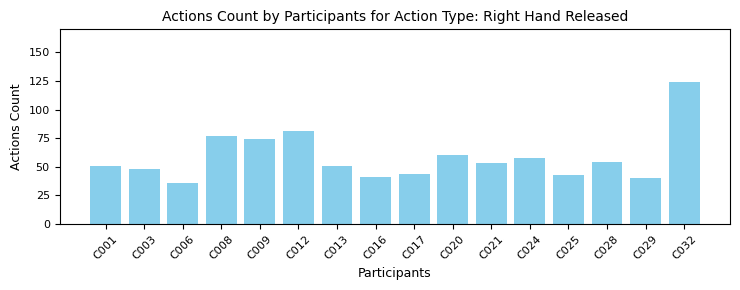

In [34]:
action_types = pivot_table_sum.index

# Create a bar chart for each action type
for action_type in action_types:
    plt.figure(figsize=(7.5,3))
    plt.bar(pivot_table_sum.columns, pivot_table_sum.loc[action_type], color='skyblue')
    plt.xlabel('Participants', fontsize=9)
    plt.ylabel('Actions Count', fontsize=9)
    plt.title(f'Actions Count by Participants for Action Type: {action_type}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylim(0, 170)
    plt.tight_layout()
    plt.show()

#### Missed Interactions according to action type

In [52]:
pivot_table_missed= combined_features_summary.pivot_table(
    index='Action Type',
    columns='Participant',
    values='Total Missed Interactions',
    aggfunc='sum',
    fill_value=0
)
pivot_table_missed = pivot_table_missed.astype(int)
pivot_table_missed = pivot_table_missed.transpose()
pivot_table_missed

Action Type,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
Participant,,,,,
C001,0,1,0,9,0
C003,0,0,0,10,0
C006,0,8,0,16,0
C008,0,5,0,22,0
C009,0,0,0,2,0
C012,0,5,0,3,0
C013,0,7,0,15,0
C016,0,10,0,3,0
C017,0,4,0,7,0


In [53]:
#pivot_table_missed.to_csv('ActionTypeMissed_ComplexPie.csv')

#### Time spent on every step by participants

In [36]:
def extract_steps_summary(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                # Check if the cell contains plotting code and skip it
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'steps_summary' in local_context:
                    return local_context['steps_summary']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None


dataframes = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_steps_summary(file_path)
    if df is not None:
        df['Participant'] = participant_id  
        dataframes.append(df)

comb_df = pd.concat(dataframes, ignore_index=True)
summary = comb_df.pivot_table(index='Participant', columns='Completed Step', values='Time Spent', fill_value=0)
summary

Completed Step,Add Sugar,Add apples to pan,Add bottom crust,Add butter,Add cinnamon,Add crust top,Add water,Pour syrup,Put pie in oven,Stir bowl
Participant,,,,,,,,,,
C001,55.984138,67.623001,10.883575,54.850884,33.037109,12.837036,7.485130,13.074173,29.308258,28.208069
C003,31.197189,125.379514,18.700104,20.857246,8.605255,7.507629,6.025170,41.206573,46.154480,28.341126
C006,118.110626,183.549500,15.726929,15.804414,31.934326,13.067017,46.604676,15.447265,26.710999,84.640747
C008,41.653915,208.696129,11.598053,41.156044,25.368682,19.957367,13.552243,14.826203,33.992890,43.968140
C009,104.666523,152.436783,17.494324,38.612061,11.566071,17.157135,13.232506,11.191041,21.599487,36.298431
C012,29.760672,147.974433,20.044953,33.957078,29.792206,25.748383,20.786091,14.334350,31.648498,157.314270
C013,62.200799,221.171464,29.298706,28.664108,21.116241,20.518677,19.548736,19.138671,24.752259,54.897033
C016,159.126901,107.637816,18.814697,51.289429,28.903259,35.779053,22.220154,14.304321,25.281983,43.062622
C017,66.473244,46.296859,15.586670,26.874329,7.946121,15.084595,2.834381,15.363815,28.872772,120.176254


In [37]:
summary['Time Variability'] = summary.std(axis=1)
summary

Completed Step,Add Sugar,Add apples to pan,Add bottom crust,Add butter,Add cinnamon,Add crust top,Add water,Pour syrup,Put pie in oven,Stir bowl,Time Variability
Participant,,,,,,,,,,,
C001,55.984138,67.623001,10.883575,54.850884,33.037109,12.837036,7.485130,13.074173,29.308258,28.208069,21.491310
C003,31.197189,125.379514,18.700104,20.857246,8.605255,7.507629,6.025170,41.206573,46.154480,28.341126,35.154070
C006,118.110626,183.549500,15.726929,15.804414,31.934326,13.067017,46.604676,15.447265,26.710999,84.640747,56.950739
C008,41.653915,208.696129,11.598053,41.156044,25.368682,19.957367,13.552243,14.826203,33.992890,43.968140,58.660959
C009,104.666523,152.436783,17.494324,38.612061,11.566071,17.157135,13.232506,11.191041,21.599487,36.298431,47.728880
C012,29.760672,147.974433,20.044953,33.957078,29.792206,25.748383,20.786091,14.334350,31.648498,157.314270,53.877959
C013,62.200799,221.171464,29.298706,28.664108,21.116241,20.518677,19.548736,19.138671,24.752259,54.897033,61.982680
C016,159.126901,107.637816,18.814697,51.289429,28.903259,35.779053,22.220154,14.304321,25.281983,43.062622,46.610894
C017,66.473244,46.296859,15.586670,26.874329,7.946121,15.084595,2.834381,15.363815,28.872772,120.176254,35.590809


In [38]:
#summary.to_csv('TimeVariability_ComplexPie.csv')

In [39]:
summary_stepscount = comb_df.pivot_table(index='Participant', columns='Completed Step', values='Count', fill_value=0)
summary_stepscount=summary_stepscount.astype(int)
summary_stepscount['Total Completed Steps']=summary_stepscount.sum(axis=1)
summary_stepscount

Completed Step,Add Sugar,Add apples to pan,Add bottom crust,Add butter,Add cinnamon,Add crust top,Add water,Pour syrup,Put pie in oven,Stir bowl,Total Completed Steps
Participant,,,,,,,,,,,
C001,1,8,1,2,1,1,1,1,1,1,18
C003,1,8,1,2,1,1,1,1,1,1,18
C006,1,8,1,2,1,1,1,1,1,1,18
C008,1,16,1,2,1,1,1,1,1,1,26
C009,1,16,1,2,1,1,1,1,1,1,26
C012,1,16,1,2,1,1,1,1,1,1,26
C013,1,16,1,2,1,1,1,1,1,1,26
C016,1,16,1,2,1,1,1,1,1,1,26
C017,1,9,1,2,1,1,1,1,1,1,19


In [40]:
#summary_stepscount.to_csv('TotalCompletedSteps_ComplexPie.csv')

In [41]:
from collections import defaultdict

def extract_object_interactions(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'object_interactions' in local_context:
                    return local_context['object_interactions']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

def summarize_interactions(interactions):
    summary = defaultdict(int)
    for obj, count in interactions.items():
        base_name = obj.split('_')[0].lower()  # Get the base name and convert to lowercase
        summary[base_name] += count
    return summary

all_interactions_summary = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]
    interactions = extract_object_interactions(file_path)
    if interactions is not None:
        summary = summarize_interactions(interactions)
        summary['Participant'] = participant_id  
        all_interactions_summary.append(summary)
    else:
        print(f"No object_interactions found in {file_path}")


# Combine all summaries into one dataframe
combined_summary = pd.DataFrame(all_interactions_summary)
combined_summary = combined_summary.set_index('Participant').transpose()
combined_summary.columns.name = None

combined_summary['Mean']=combined_summary.mean(axis=1)
combined_summary['Median']=combined_summary.median(axis=1)
combined_summary['Std Dev']=combined_summary.std(axis=1)
Q1 = combined_summary.quantile(0.25, axis=1)
Q3 = combined_summary.quantile(0.75, axis=1)
combined_summary['IQR'] = Q3 - Q1
combined_summary.loc['Total Interacted Objects'] = combined_summary.sum()

combined_summary = combined_summary.fillna(0).astype(int)
combined_summary

,C001,C003,C006,C008,C009,C012,C013,C016,C017,C020,C021,C024,C025,C028,C029,C032,Mean,Median,Std Dev,IQR
newmeasuringcup,16,2,14,6,4,6,10,10,8,12,14,2,6,2,20,14,9,9,5,7
piebowl,12,16,18,16,16,30,14,20,14,10,12,30,6,16,22,42,18,16,8,6
knife,12,22,10,30,14,36,26,12,12,32,2,16,8,12,10,22,17,14,9,11
applepiecookbook,6,7,27,9,7,9,7,6,11,7,11,7,8,9,4,7,8,7,4,2
staticmeshactor,12,14,16,24,18,24,24,22,10,16,6,6,4,10,16,6,14,14,6,8
stirspoonpie,6,6,8,12,6,14,14,12,6,10,4,4,2,2,10,20,8,8,4,5
apple,65,56,37,93,73,87,88,70,69,79,55,76,66,91,31,68,69,69,16,17
cinnyshakergrabable,4,2,2,2,4,6,14,4,2,4,2,4,2,2,2,16,4,4,4,2
piepan,4,12,8,8,4,4,8,4,4,6,14,8,8,14,0,6,7,7,3,4
waterpitcher,4,2,8,6,14,4,6,6,2,10,4,2,2,8,2,22,6,6,5,4


In [42]:
combined_summary.to_csv('InteractedObjects_ComplexPie.csv')

In [54]:
import pandas as pd
import glob
import os

# Function to extract the features summary from each notebook
def extract_interacted_df(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'interactions_df' in local_context:
                    interactions_df = local_context['interactions_df']
                    interactions_df.index.name = 'Completed Step'
                    interactions_df = interactions_df.reset_index()
                    return interactions_df
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# Extract data from each notebook
features_intobjects = []
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_interacted_df(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add participant ID to the DataFrame
        features_intobjects.append(df)
    else:
        print(f"No interactions_df found in {file_path}")

# Combine all participants' data into one DataFrame
combined_intobjects = pd.concat(features_intobjects, ignore_index=True)
combined_intobjects = combined_intobjects.set_index('Participant').reset_index()
combined_intobjects


,Participant,Completed Step,Apple,ApplePieCookbook,Butter,ButterHolder,CinnyShakerGrabable,Knife,NewMeasuringCup,PieBowl,...,SaucePot,StaticMeshActor,StirSpoonPie,SugarJar,WaterPitcher,oven,Interacted Objects,UnecessaryPomegranate,BeefStewCookbook,UnecessaryLime
0,C001,Add Sugar,0,2,0,0,2,0,4,0,...,0,2,0,2,0,0.0,12,NaN,NaN,NaN
1,C001,Add water,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0.0,3,NaN,NaN,NaN
2,C001,Add butter,0,0,3,2,0,0,4,0,...,0,0,0,0,3,0.0,12,NaN,NaN,NaN
3,C001,Add apples to pan,49,0,0,0,0,10,2,2,...,0,10,2,0,0,0.0,75,NaN,NaN,NaN
4,C001,Add cinnamon,16,1,4,0,1,0,2,2,...,0,0,0,0,0,0.0,26,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,C032,Add water,0,0,0,0,0,0,9,0,...,0,0,0,0,19,0.0,28,NaN,NaN,NaN
152,C032,Add cinnamon,32,1,1,0,14,6,2,10,...,0,0,0,0,0,0.0,66,NaN,NaN,NaN
153,C032,Add crust top,0,1,0,0,0,0,0,18,...,0,0,0,0,0,0.0,22,NaN,NaN,NaN
154,C032,Put pie in oven,0,1,0,0,0,0,0,0,...,0,0,0,0,0,4.0,9,NaN,NaN,NaN


In [57]:
combined_intobjects.to_csv('InteractedObjects_PerStep.csv', index=False)